Hello, everyone My name is Mostafa Emad AL-din Essam, and I'm excited to guide you through an introduction to My Project

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import random
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer
from sklearn import metrics

In [2]:
df=pd.read_csv("Iris.csv")

# Decision Tree Classifier Project - Iris Dataset

## Introduction

This project involves the use of a Decision Tree Classifier to analyze the famous Iris dataset. The goal is to train a machine learning model to classify iris flowers into different species based on their sepal and petal characteristics.

## Dataset Overview

The Iris dataset contains measurements of four features (sepal length, sepal width, petal length, and petal width) for 150 iris flowers, divided into three species: setosa, versicolor, and virginica.

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Dataset Columns

- **SepalLengthCm:** Length of the sepal in centimeters.
- **SepalWidthCm:** Width of the sepal in centimeters.
- **PetalLengthCm:** Length of the petal in centimeters.
- **PetalWidthCm:** Width of the petal in centimeters.
- **Species:** The species of the iris flower (setosa, versicolor, virginica).

## Project Steps

### 1. Data Exploration

Explore the dataset to gain insights into the distribution of features and the relationships between them. Utilize visualizations such as pair plots, histograms, and correlation matrices.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### 2. Data Preprocessing

Preprocess the data by handling missing values, encoding categorical variables (if any), and splitting the dataset into training and testing sets.

In [6]:
df.drop_duplicates()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


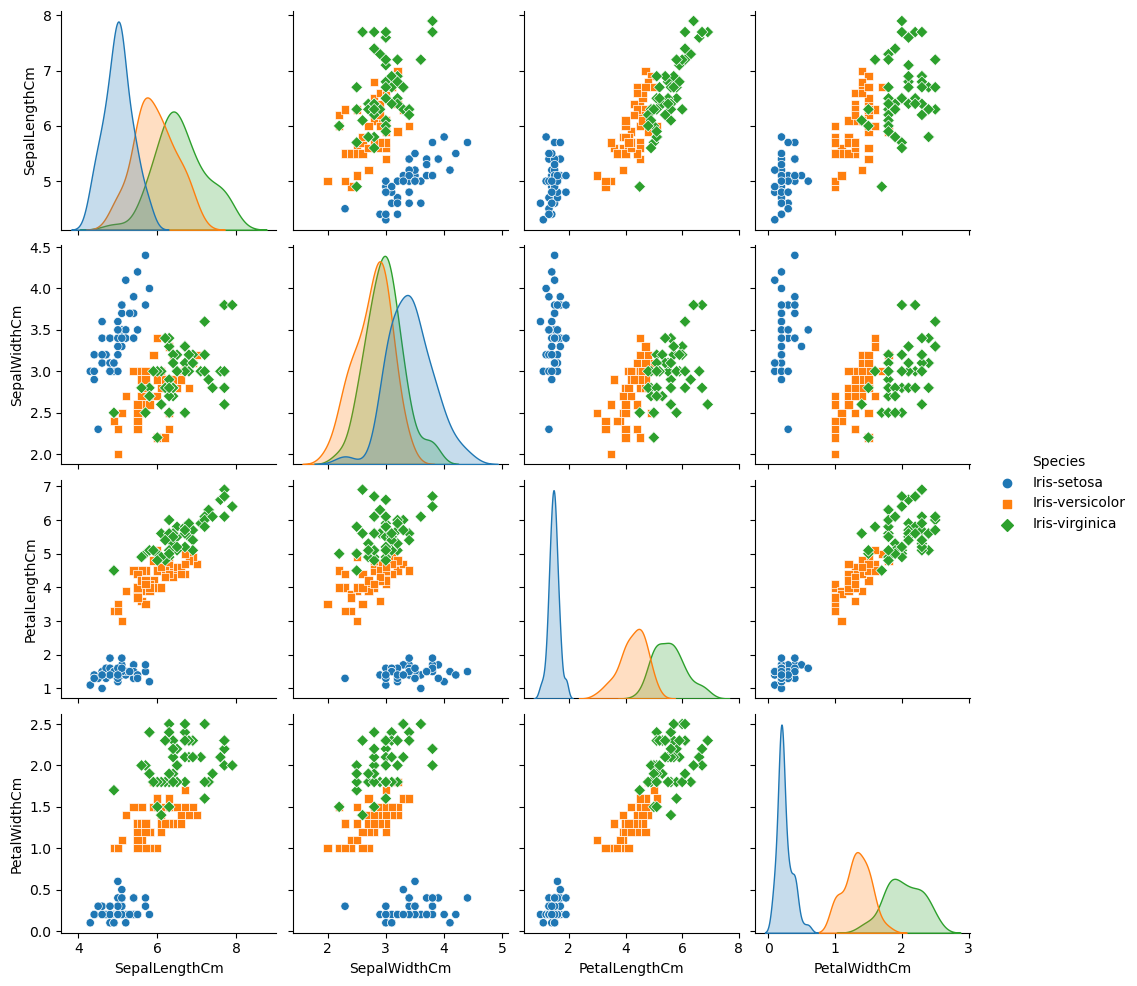

In [8]:
df_no_id = df.drop(columns=['Id'])
sns.pairplot(df_no_id, hue='Species', markers=["o", "s", "D"])
plt.show()

### 3. Model Training

Train a Decision Tree Classifier using the training data.

In [9]:
df = df.drop(columns=['Id'])
X = df.drop(columns=['Species'])
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



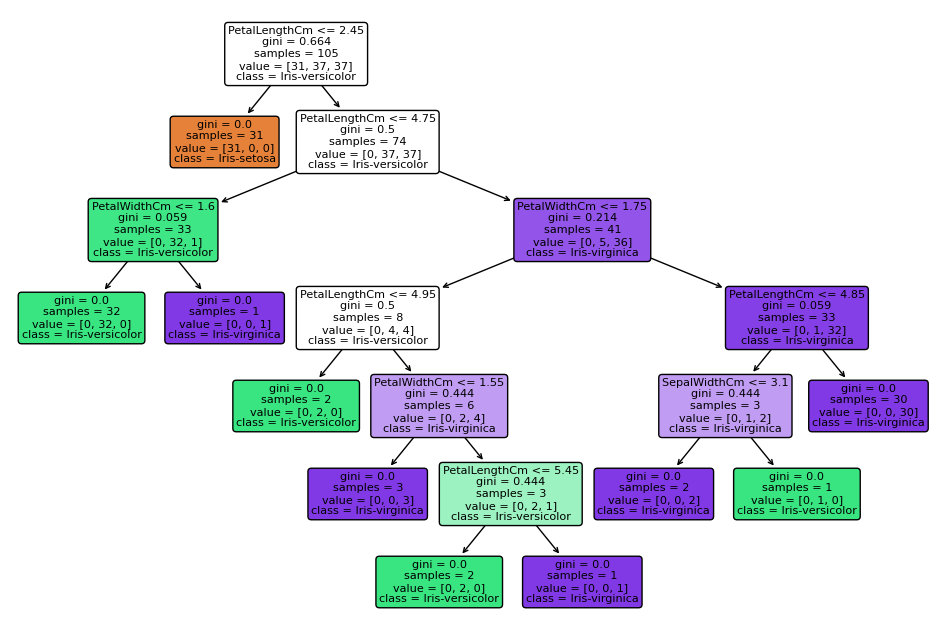

In [11]:
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=X.columns, class_names=y.unique(), filled=True, rounded=True)
plt.show()

### 4. Test the Model with New Data

Test the trained model with a new data point to see how it classifies unseen observations.

In [12]:
new_data_point = {
    'SepalLengthCm': 5.0,
    'SepalWidthCm': 3.0,
    'PetalLengthCm': 1.5,
    'PetalWidthCm': 0.2
}

# Convert the dictionary to a DataFrame
new_data_df = pd.DataFrame([new_data_point])

# Make predictions using the trained model
prediction = dt_classifier.predict(new_data_df)

print(f"Predicted class: {prediction[0]}")

Predicted class: Iris-setosa
